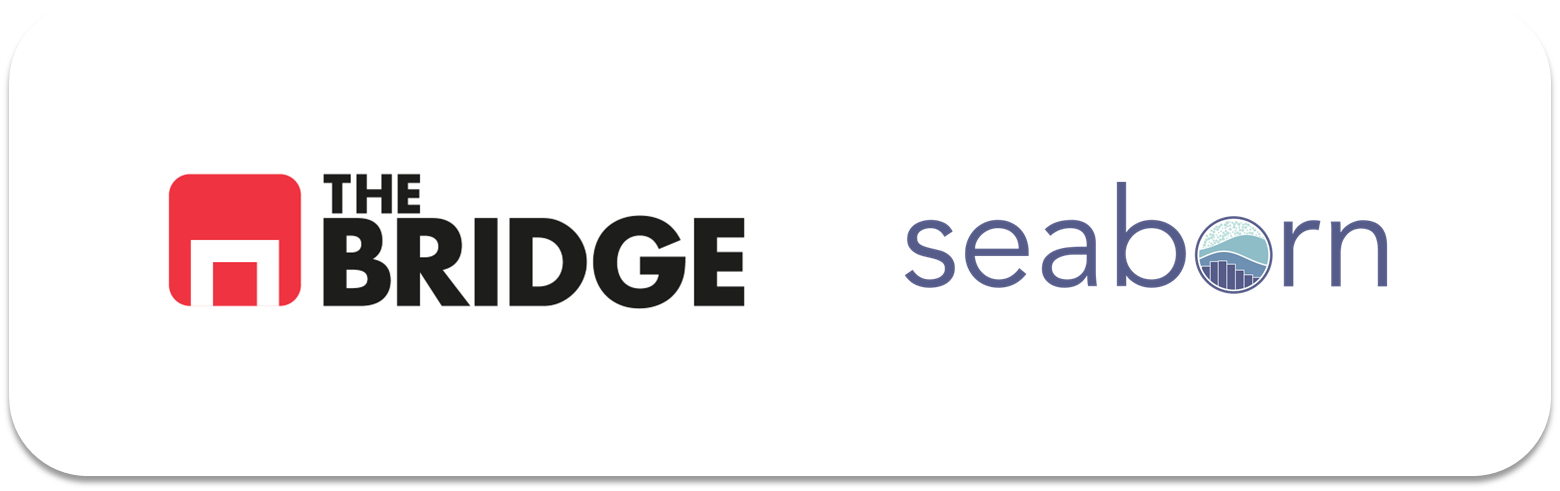

## PRACTICA OBLIGATORIA: VISUALIZACION Y PRESENTACION

* La práctica obligatoria de esta unidad se divide en dos partes, una dedicada a visualización y construcción de funciones, y la otra a hacer una presentación de resultados. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [90]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from bootcampviztools import plot_categorical_relationship_fin, pinta_distribucion_categoricas, plot_grouped_histograms, plot_grouped_boxplots, plot_combined_graphs, plot_categorical_numerical_relationship, bubble_plot, grafico_dispersion_con_correlacion
from scipy.stats import chi2_contingency, mannwhitneyu

## #1 VISUALIZACION

### #1.1

Carga el dataset de las ciudades de California que está en la ruta "./data/california_cities.csv". Muestra su contenido, deshazte de las filas con nulos.

In [2]:
df = pd.read_csv("./data/california_cities.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          482 non-null    int64  
 1   city                482 non-null    object 
 2   latd                482 non-null    float64
 3   longd               482 non-null    float64
 4   elevation_m         434 non-null    float64
 5   elevation_ft        470 non-null    float64
 6   population_total    482 non-null    int64  
 7   area_total_sq_mi    480 non-null    float64
 8   area_land_sq_mi     482 non-null    float64
 9   area_water_sq_mi    481 non-null    float64
 10  area_total_km2      477 non-null    float64
 11  area_land_km2       478 non-null    float64
 12  area_water_km2      478 non-null    float64
 13  area_water_percent  477 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 52.8+ KB


In [3]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 427 entries, 0 to 481
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          427 non-null    int64  
 1   city                427 non-null    object 
 2   latd                427 non-null    float64
 3   longd               427 non-null    float64
 4   elevation_m         427 non-null    float64
 5   elevation_ft        427 non-null    float64
 6   population_total    427 non-null    int64  
 7   area_total_sq_mi    427 non-null    float64
 8   area_land_sq_mi     427 non-null    float64
 9   area_water_sq_mi    427 non-null    float64
 10  area_total_km2      427 non-null    float64
 11  area_land_km2       427 non-null    float64
 12  area_water_km2      427 non-null    float64
 13  area_water_percent  427 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 50.0+ KB


In [4]:
df.head()

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01
5,5,AlisoViejo,33.575000,-117.725556,127.0,417.0,47823,7.472,7.472,0.000,19.352,19.352,0.000,0.00
6,6,Alturas,41.487222,-120.542500,1332.0,4370.0,2827,2.449,2.435,0.014,6.342,6.306,0.036,0.57


### #1.2

Crea una función similar a la que se pide en el ejercicio 6 de la segunda tanda de ejercicios del workout. Es decir, una función para pintar diagramas de dispersion que tenga seis argumentos, pero ojo al cambio en el quinto:
1. Un dataframe
2. Una columna numérica del dataframe
3. Una columna numérica del dataframe diferente a la anterior.
4. Un columna categórica (Opcional, valor por defecto None)
5. Un valor para el tamaño de los puntos o una cadena, pero que puede ser una cadena de caracteres, en cuyo caso se debe interpretar como una de las columnas del dataframe cuyos valores deben controlar el tamaño
6. Un sexto argumento "escala", que permita manipular la escala del tamaño en el caso de que el quinto argumento sea una cadena. Este argumento multiplicará a los valores de la columna indicada en el parámetro anterior (así si quiero dividir por 10000, este sexto argumento tendrá que valer 1/10000)

La función debe pintar el diagrama de dispersión de la columna numérica 1, en el eje X, frente a la columna numérica 2, en el eje Y, usando un código de colores en función de la columna categórica y con el tamaño de los puntos según el argumento correspondiente. 

Si no se diera una columna categórica como argumento, el color no debe pasarse como parámetro a la función de Seaborn o Matplotlib que uses.

EXTRA: Añade un argumento que controle si la función pinta una leyenda para colores y tamaños o un colorbar y una leyenda para los tamaños. NO TE PREOCUPES POR EL FORMATO DE LA LEYENDA (lo veremos en la sesión en vivo)

In [44]:
def scatter_plot_custom(df, num_col1, num_col2, cat_col=None, size=5, scale=1, transparency=1.0, show_legend=True):
    plt.figure(figsize=(8, 6))
    
    if isinstance(size, str):
        size_col = df[size] * scale
        plt.scatter(df[num_col1], df[num_col2], c=df[cat_col] if cat_col else None, s=size_col, alpha=transparency)
    else:
        plt.scatter(df[num_col1], df[num_col2], c=df[cat_col] if cat_col else None, s=size, alpha=transparency)
    
    plt.title(f'Diagrama de Dispersión de {num_col1} vs {num_col2} {"y con " + cat_col + " en color" if cat_col else ""}')
    plt.xlabel(num_col1)
    plt.ylabel(num_col2)
    
    if show_legend:
        if cat_col:
            plt.legend(title=cat_col)
        else:
            plt.colorbar(label='Tamaño')
            plt.legend(handles=[], labelspacing=1.2, title='Tamaño')

    plt.show()


### #1.3

Pinta el diagrama de dispersión de longitud y latitud (longitud en las x, latitud en las y) de las ciudades, usando el tamaño de las ciudades para el tamaño de los puntos y los colores para mostrar la población. Previamente crea una columna nueva "log_poblacion" y asignale el log decimal de la poblacion (np.log10() y como argumento los valores de la columna "population_total"). Usa "log_poblacion" para el color.

Un ejemplo de como podría salir para que lo tengas de referencia: (olvidate de la leyenda, auque si quieres como extra puedes intentar ver cómo crearla así)

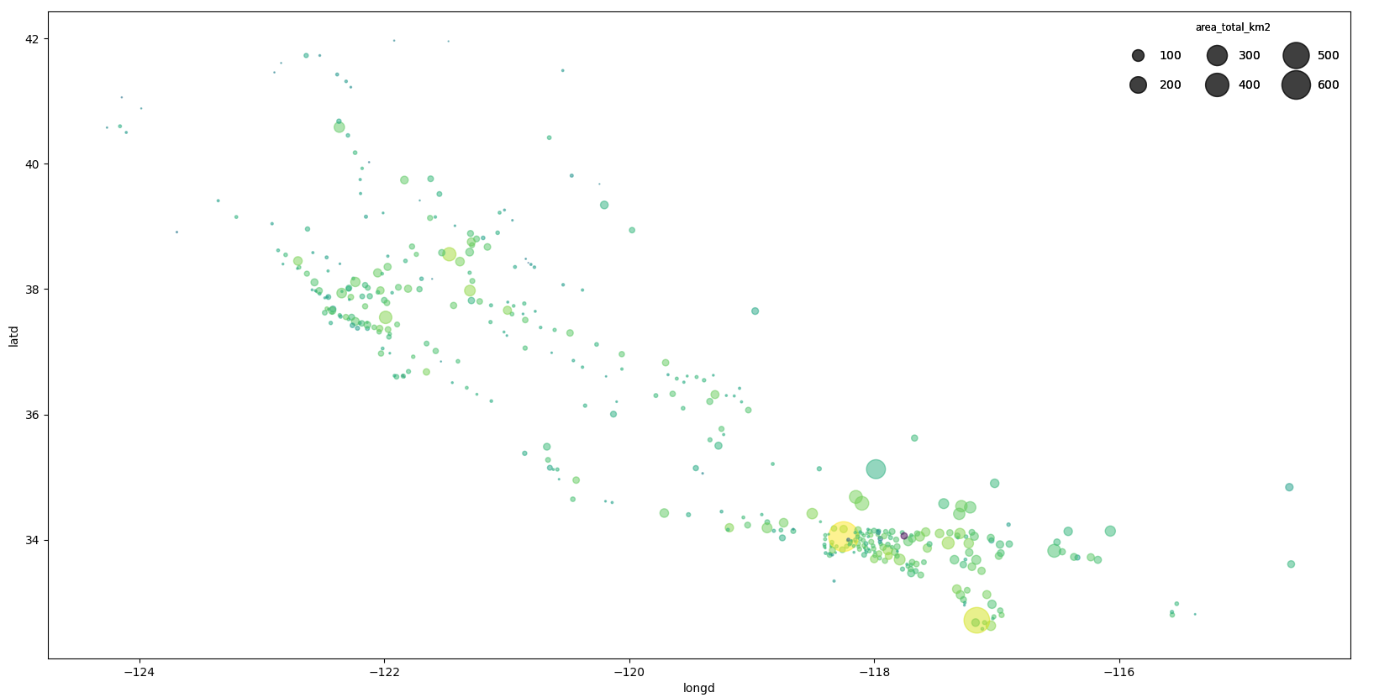

In [27]:
df['log_poblacion'] = np.log10(df['population_total'])


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 427 entries, 0 to 481
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          427 non-null    int64  
 1   city                427 non-null    object 
 2   latd                427 non-null    float64
 3   longd               427 non-null    float64
 4   elevation_m         427 non-null    float64
 5   elevation_ft        427 non-null    float64
 6   population_total    427 non-null    int64  
 7   area_total_sq_mi    427 non-null    float64
 8   area_land_sq_mi     427 non-null    float64
 9   area_water_sq_mi    427 non-null    float64
 10  area_total_km2      427 non-null    float64
 11  area_land_km2       427 non-null    float64
 12  area_water_km2      427 non-null    float64
 13  area_water_percent  427 non-null    float64
 14  log_poblacion       427 non-null    float64
dtypes: float64(12), int64(2), object(1)
memory usage: 53.4+ KB


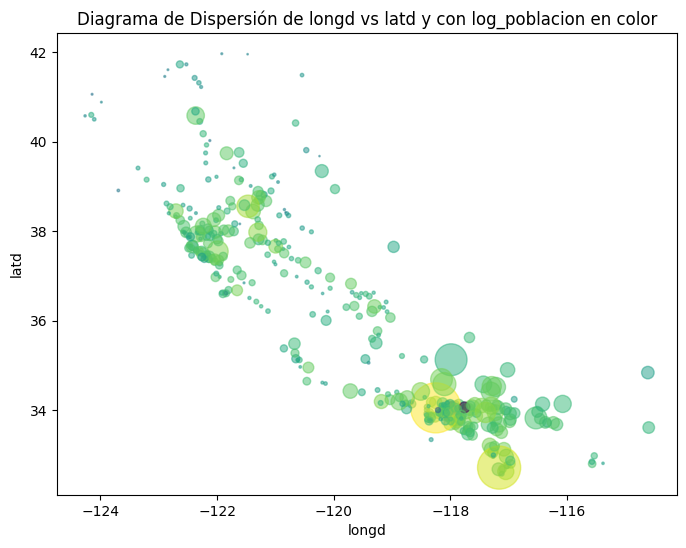

In [42]:
scatter_plot_custom(df, 'longd', 'latd', cat_col='log_poblacion', size='area_total_km2', transparency=0.5, show_legend=False)

## #2: Presentación

En esta parte tendrás que hacer dos cosas, crear una presentación sobre el titanic de no más de 6 slides, sin incluir portada, con los siguientes mensajes y su apoyo en datos:  
1- El titanic fue un accidente con una tasa de mortalidad alta.  
2- En esa ocasión los datos apoyan que se dio el "Las mujeres y los niños primero", pero...  
3- ... que la clase en la que se viajes tuvo una influencia significativa y podría explicar...  
4- ... las diferencias de tasas de supervivencia entre mujeres y niños.    
5- Además aunque el puerto de embarque parece influir, se podría asumir que lo fue el tipo de pasaje que embarcó en cada uno.  

Y generar el notebook con las gráficas que vas a emplear en la presentación. Tienes que entregar ambas cosas.

In [85]:
df_titanic = pd.read_csv("./data/titanic.csv")

In [86]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [87]:
## nulos en age

es_woman = df_titanic.who == 'woman'
es_child = df_titanic.who == 'child'
es_man = df_titanic.who == 'man'

media_woman = df_titanic.loc[es_woman,'age'].mean()
media_child = df_titanic.loc[es_child,'age'].mean()
media_man = df_titanic.loc[es_man,'age'].mean()

es_age_nulo = df_titanic.age.isna()

df_titanic.loc[es_woman & es_age_nulo, 'age'] = media_woman
df_titanic.loc[es_child & es_age_nulo, 'age'] = media_child
df_titanic.loc[es_man & es_age_nulo, 'age'] = media_man

## nulos en embark_town
mode_value = df_titanic['embark_town'].mode().iloc[0]
df_titanic['embark_town'].fillna(mode_value, inplace=True)

## elimino deck
df_titanic.drop(['deck', 'survived', 'pclass', 'embarked'], axis=1, inplace=True)

## redondeo fare
df_titanic['fare'] = round(df_titanic['fare'], 2)


In [88]:
df_titanic.head()

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.25,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.28,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.92,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.10,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.05,Third,man,True,Southampton,no,True


In [89]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sex          891 non-null    object 
 1   age          891 non-null    float64
 2   sibsp        891 non-null    int64  
 3   parch        891 non-null    int64  
 4   fare         891 non-null    float64
 5   class        891 non-null    object 
 6   who          891 non-null    object 
 7   adult_male   891 non-null    bool   
 8   embark_town  891 non-null    object 
 9   alive        891 non-null    object 
 10  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 64.5+ KB


In [71]:
df = df_titanic.copy()

In [ ]:
################ 1 ###################

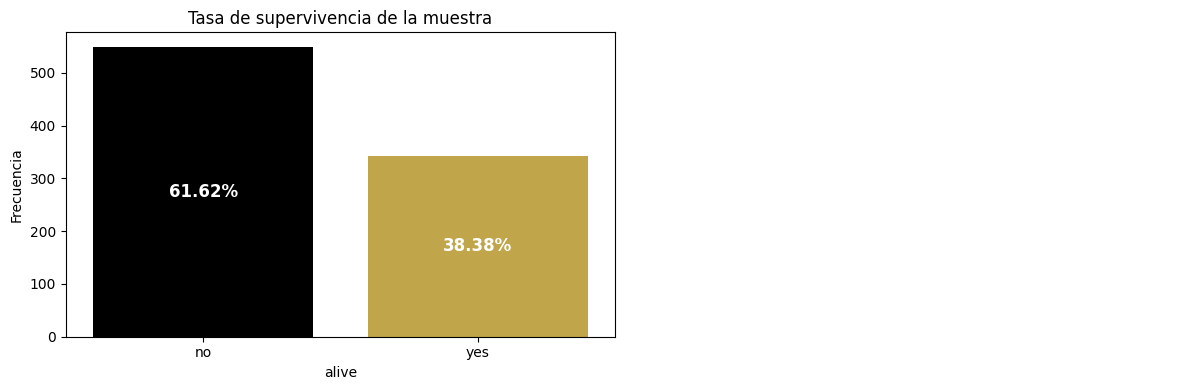

In [199]:
def pinta_categoricas(df, columnas, ancho_figura=12):
    n_rows = (len(columnas) + 1) // 2
    fig, axs = plt.subplots(n_rows, 2, figsize=(12, n_rows * 4), facecolor='none')  # Establece el color de fondo como transparente
    axs = axs.flatten()

    # Define la paleta de colores personalizada
    colores_personalizados = ['#000000', '#D4AF37']

    for i, col in enumerate(columnas):
        sns.countplot(x=col, data=df, ax=axs[i], hue=col, palette=colores_personalizados, legend=False)

        total = float(len(df[col]))
        for p in axs[i].patches:
            height = p.get_height()
            axs[i].text(p.get_x() + p.get_width() / 2.,
                        height / 2,
                        f'{(height / total * 100):.2f}%',
                        ha="center", va="center", fontsize=12, fontweight='bold', color='white')  # Cambia el color del texto a blanco

        axs[i].set_title(f'Tasa de supervivencia de la muestra')
        axs[i].set_xlabel(col)
        axs[i].set_ylabel('Frecuencia')

    if len(columnas) % 2 != 0:
        axs[-1].axis('off')

    plt.tight_layout()
    plt.savefig('./img/alive.png', transparent=True)  # Guarda la figura como un archivo con fondo transparente
    plt.show()  # Muestra la figura

lista = ["alive",]
pinta_categoricas(df_titanic, lista)


In [ ]:
## 1 ALTA TASA DE MORTALIDAD DEL TITANIC

In [78]:
def pinta_categoricas(df, columnas, ancho_figura=12):
    n_rows = (len(columnas) + 1) // 2
    fig, axs = plt.subplots(n_rows, 2, figsize=(12, n_rows * 4))
    axs = axs.flatten()

    for i, col in enumerate(columnas):
        sns.countplot(x=col, data=df, ax=axs[i], hue=col, legend=False)

        total = float(len(df[col]))
        for p in axs[i].patches:
            height = p.get_height()
            axs[i].text(p.get_x() + p.get_width() / 2.,
                        height / 2,
                        f'{(height / total * 100):.2f}%',
                        ha="center", va="center", fontsize=12, fontweight='bold')

        axs[i].set_title(f'Frecuencias Absolutas de {col}')
        axs[i].set_xlabel(col)
        axs[i].set_ylabel('Frecuencia')

    if len(columnas) % 2 != 0:
        axs[-1].axis('off')

    plt.tight_layout()
    plt.show()


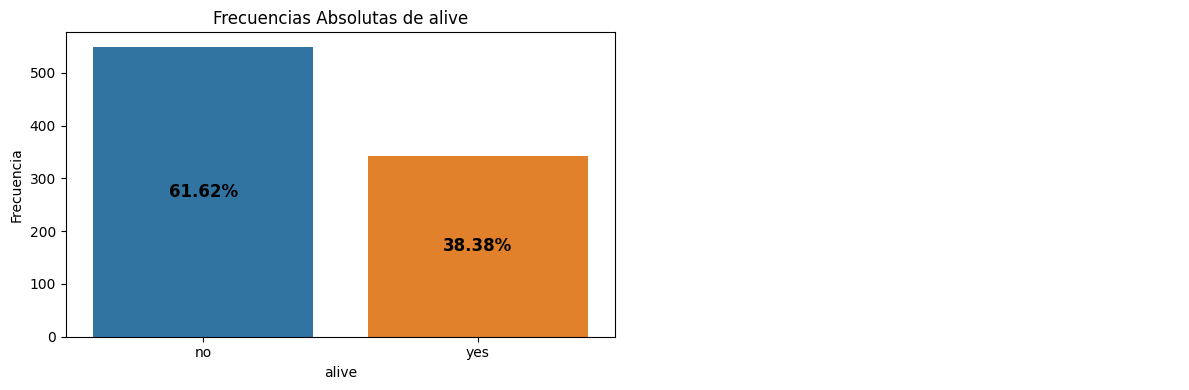

In [164]:
lista = ["alive",]
pinta_categoricas(df_titanic, lista)

In [ ]:
## 2 MUJERES Y NIÑOS SE SALVARON PORCENTUALMENTE MÁS?

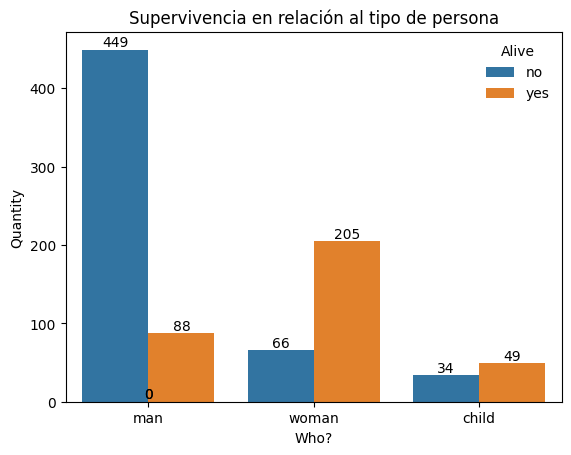

In [155]:
plot = sns.countplot(x='who', hue='alive', data=df_titanic)
plt.xlabel('Who?')
plt.ylabel('Quantity')
plt.title('Supervivencia en relación al tipo de persona')
plt.legend(title='Alive', loc='upper right')

# Obtener las alturas de las barras
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')

# Configurar la leyenda para quitar los bordes
leg = plot.get_legend()
leg.set_frame_on(False)

plt.show()


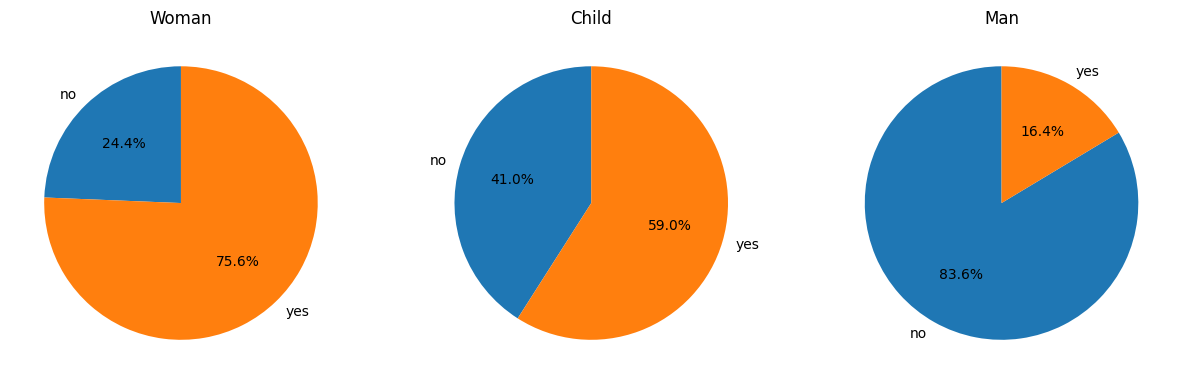

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular las frecuencias relativas
relative_counts = df_titanic.groupby(['who', 'alive']).size().unstack().apply(lambda x: x / x.sum(), axis=1)

# Gráficos de queso
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Gráfico de mujer (woman)
axes[0].pie(relative_counts.loc['woman'], labels=relative_counts.columns, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Woman')

# Gráfico de niños (child)
axes[1].pie(relative_counts.loc['child'], labels=relative_counts.columns, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Child')

# Gráfico de hombres (man)
axes[2].pie(relative_counts.loc['man'], labels=relative_counts.columns, autopct='%1.1f%%', startangle=90)
axes[2].set_title('Man')

plt.show()



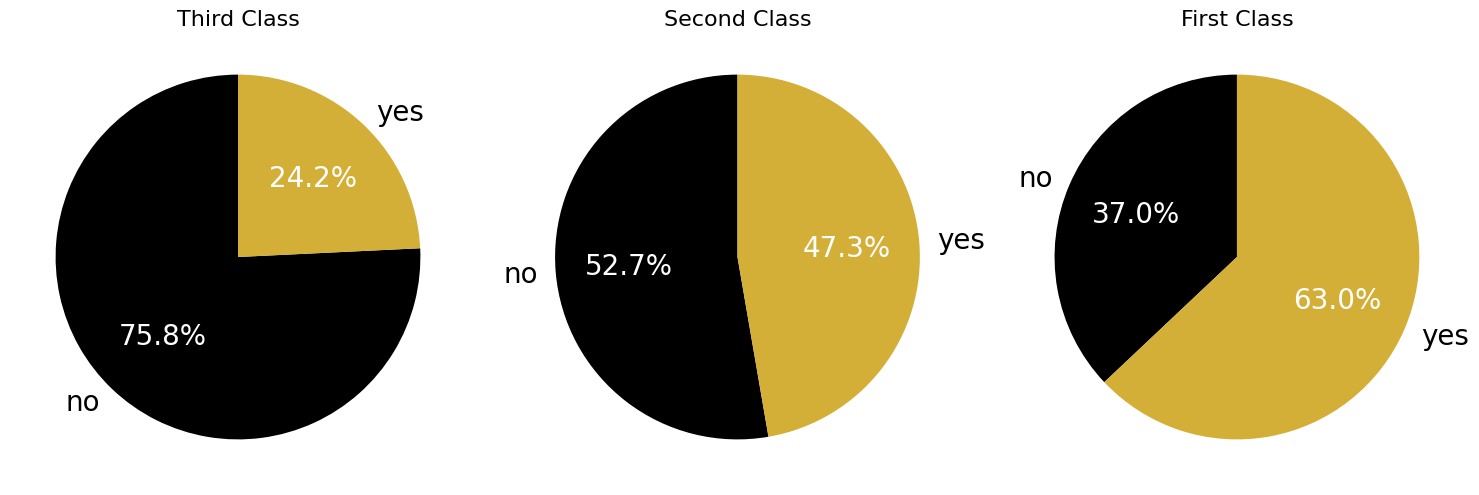

In [209]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular las frecuencias relativas para 'class' y 'alive'
relative_counts_class = df_titanic.groupby(['class', 'alive']).size().unstack().apply(lambda x: x / x.sum(), axis=1)

# Gráficos de queso
fig, axes = plt.subplots(1, 3, figsize=(15, 5), facecolor='none')  # Establecer el color de fondo como transparente y ajustar el tamaño
axes = axes.flatten()

# Colores personalizados para cada gráfico
colors = ['#000000', '#D4AF37']

for i, class_name in enumerate(['Third', 'Second', 'First']):
    pie = axes[i].pie(relative_counts_class.loc[class_name], labels=relative_counts_class.columns, autopct='%1.1f%%', startangle=90, colors=colors, textprops={'fontsize': 20})
    axes[i].set_title(f'{class_name} Class', fontsize=16, pad=-15)  # Títulos más grandes y ajuste en el espaciado

    # Ajustar el tamaño y color de los porcentajes
    for text in pie[2]:
        text.set_fontsize(20)  # Tamaño de fuente más grande para porcentajes
        text.set_color('white')  # Texto en color blanco

plt.tight_layout()
plt.savefig('./img/class_alive_piecharts.png', transparent=True)  # Guardar la figura como un archivo con fondo transparente
plt.show()


In [ ]:
## 3 . INFLUYÓ LA CLASE A LA HORA DE SALVARSE?

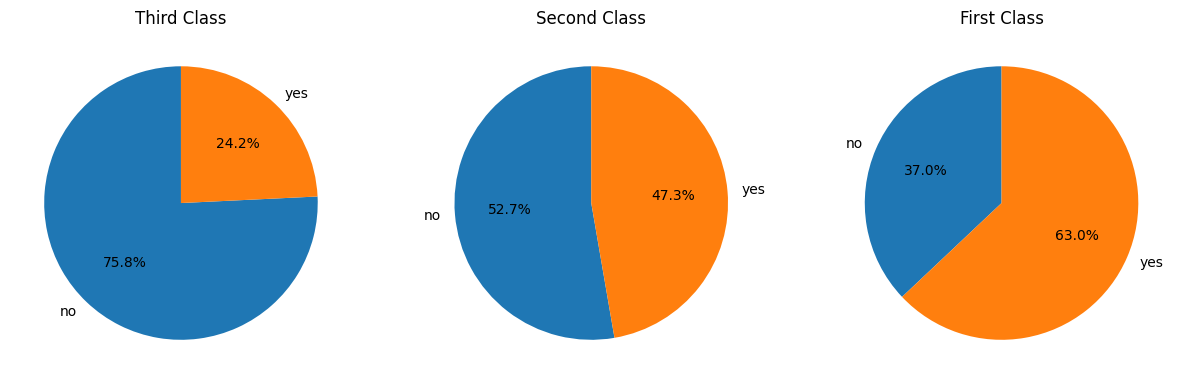

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular las frecuencias relativas para 'class' y 'alive'
relative_counts_class = df_titanic.groupby(['class', 'alive']).size().unstack().apply(lambda x: x / x.sum(), axis=1)

# Gráficos de queso
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Gráfico para 'Third' class
axes[0].pie(relative_counts_class.loc['Third'], labels=relative_counts_class.columns, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Third Class')

# Gráfico para 'Second' class
axes[1].pie(relative_counts_class.loc['Second'], labels=relative_counts_class.columns, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Second Class')

# Gráfico para 'First' class
axes[2].pie(relative_counts_class.loc['First'], labels=relative_counts_class.columns, autopct='%1.1f%%', startangle=90)
axes[2].set_title('First Class')

plt.show()


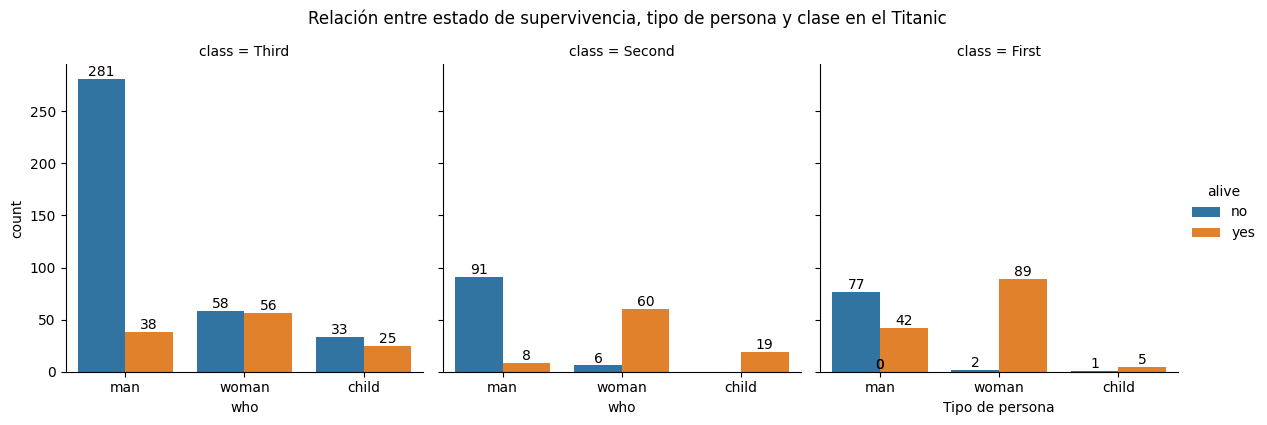

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir el orden de las clases
class_order = ['Third', 'Second', 'First']

# Crear el gráfico de barras con el orden personalizado
g = sns.catplot(x='who', hue='alive', col='class', data=df_titanic, kind='count',
                height=4, aspect=1, col_order=class_order)

# Agregar etiquetas de valores a cada barra
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Etiquetas y título
plt.xlabel('Tipo de persona')
plt.ylabel('Cantidad de personas')
plt.suptitle('Relación entre estado de supervivencia, tipo de persona y clase en el Titanic', y=1.05)
plt.show()



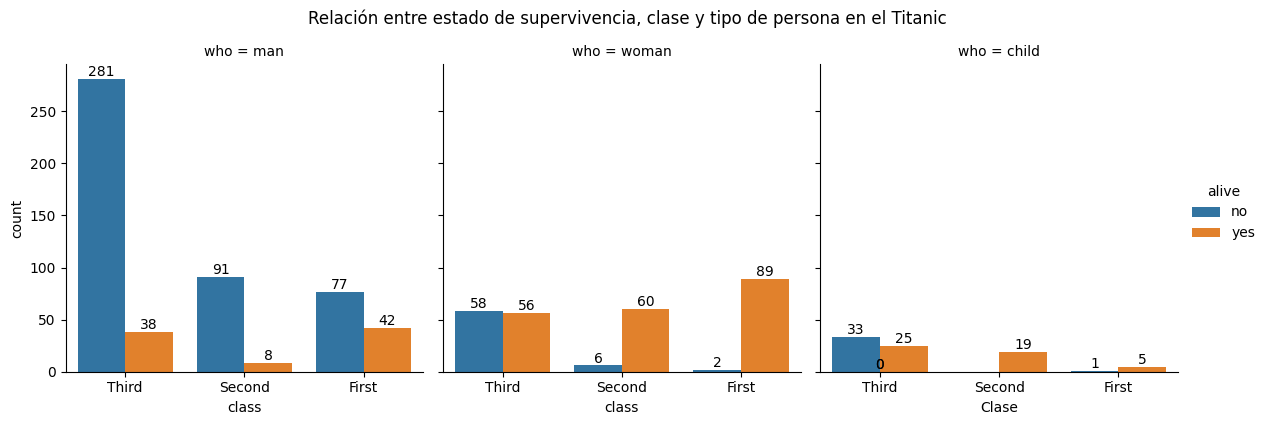

In [160]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir el orden de las clases
class_order = ['Third', 'Second', 'First']

# Definir el orden de los tipos de persona
who_order = ['man', 'woman', 'child']

# Crear el gráfico de barras con los ejes intercambiados y los órdenes personalizados
g = sns.catplot(x='class', hue='alive', col='who', data=df_titanic, kind='count',
                height=4, aspect=1, col_order=who_order, order=class_order)

# Agregar etiquetas de valores a cada barra
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Etiquetas y título
plt.xlabel('Clase')
plt.ylabel('Cantidad de personas')
plt.suptitle('Relación entre estado de supervivencia, clase y tipo de persona en el Titanic', y=1.05)
plt.show()



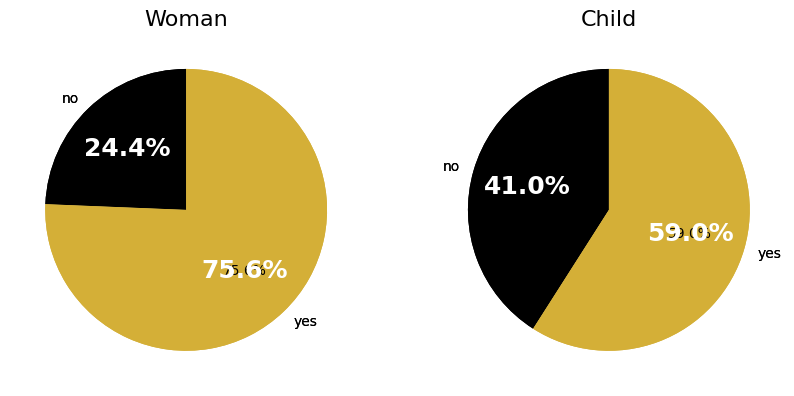

In [229]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular las frecuencias relativas
relative_counts = df_titanic.groupby(['who', 'alive']).size().unstack().apply(lambda x: x / x.sum(), axis=1)

# Gráficos de queso
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Configurar colores personalizados
colors = ['#000000', '#D4AF37']

# Gráfico de mujer (woman)
axes[0].pie(relative_counts.loc['woman'], labels=relative_counts.columns, autopct='%1.1f%%', startangle=90, colors=colors)
axes[0].set_title('Woman', fontsize=16)  # Título más grande
wedges, _, autotexts = axes[0].pie(relative_counts.loc['woman'], labels=relative_counts.columns, autopct='%1.1f%%', startangle=90, colors=colors)
plt.setp(autotexts, size=18, weight="bold", color='white')  # Porcentajes en blanco y más grandes

# Gráfico de niños (child)
axes[1].pie(relative_counts.loc['child'], labels=relative_counts.columns, autopct='%1.1f%%', startangle=90, colors=colors)
axes[1].set_title('Child', fontsize=16)  # Título más grande
wedges, _, autotexts = axes[1].pie(relative_counts.loc['child'], labels=relative_counts.columns, autopct='%1.1f%%', startangle=90, colors=colors)
plt.setp(autotexts, size=18, weight="bold", color='white')  # Porcentajes en blanco y más grandes

# Guardar la imagen antes de mostrarla
plt.savefig('./img/pie_charts.png', transparent=True)  # Ajusta la ubicación y el formato según lo necesites
plt.show()



In [ ]:
## 4 . HAY DIFERENCIAS ENTRE LAS TASAS DE SUPERVIVENCIA ENTRE MUJERES Y NIÑOS??

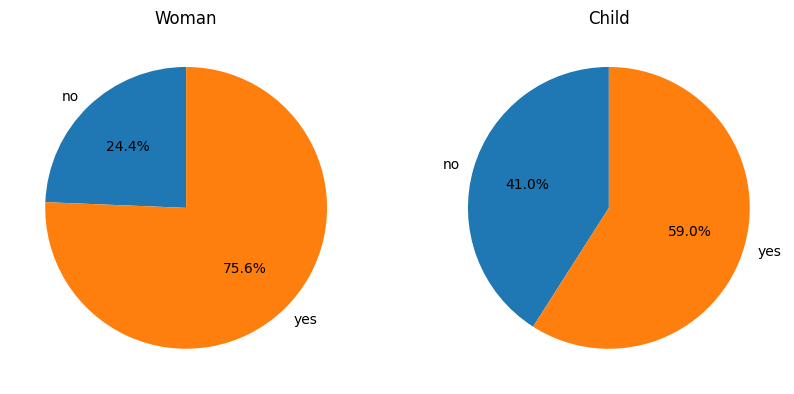

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular las frecuencias relativas
relative_counts = df_titanic.groupby(['who', 'alive']).size().unstack().apply(lambda x: x / x.sum(), axis=1)

# Gráficos de queso
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Gráfico de mujer (woman)
axes[0].pie(relative_counts.loc['woman'], labels=relative_counts.columns, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Woman')

# Gráfico de niños (child)
axes[1].pie(relative_counts.loc['child'], labels=relative_counts.columns, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Child')

plt.show()


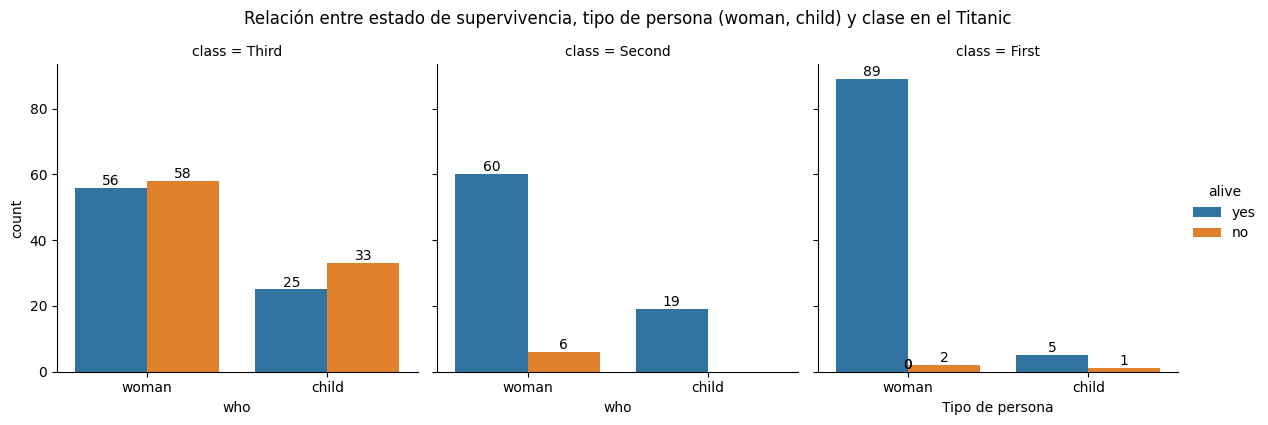

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar el DataFrame para incluir solo 'woman' y 'child' en la columna 'who'
filtered_df = df_titanic[df_titanic['who'].isin(['woman', 'child'])]

# Definir el orden de las clases
class_order = ['Third', 'Second', 'First']

# Crear el gráfico de barras con los datos filtrados
g = sns.catplot(x='who', hue='alive', col='class', data=filtered_df, kind='count',
                height=4, aspect=1, col_order=class_order)

# Agregar etiquetas de valores a cada barra
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Etiquetas y título
plt.xlabel('Tipo de persona')
plt.ylabel('Cantidad de personas')
plt.suptitle('Relación entre estado de supervivencia, tipo de persona (woman, child) y clase en el Titanic', y=1.05)
plt.show()


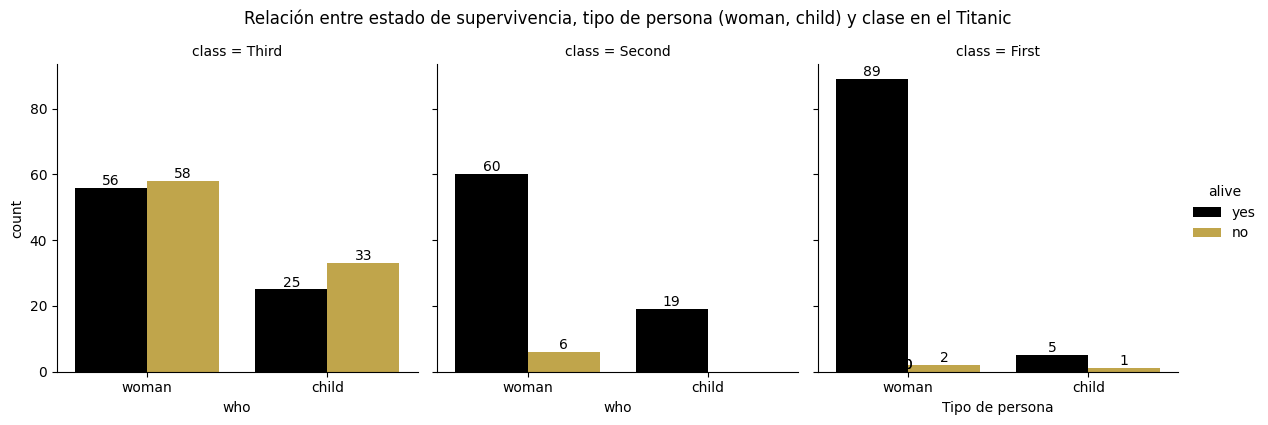

In [226]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar el DataFrame para incluir solo 'woman' y 'child' en la columna 'who'
filtered_df = df_titanic[df_titanic['who'].isin(['woman', 'child'])]

# Definir el orden de las clases
class_order = ['Third', 'Second', 'First']

# Definir los colores personalizados
colors = ['#000000', '#D4AF37']

# Crear el gráfico de barras con los datos filtrados y colores personalizados
g = sns.catplot(x='who', hue='alive', col='class', data=filtered_df, kind='count',
                height=4, aspect=1, col_order=class_order, palette=colors)

# Agregar etiquetas de valores a cada barra
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Etiquetas y título
plt.xlabel('Tipo de persona')
plt.ylabel('Cantidad de personas')
plt.suptitle('Relación entre estado de supervivencia, tipo de persona (woman, child) y clase en el Titanic', y=1.05)

# Guardar la imagen antes de mostrarla
plt.savefig('./img/bar_chart.png', transparent=True)  # Ajusta la ubicación y el formato según lo necesites
plt.show()


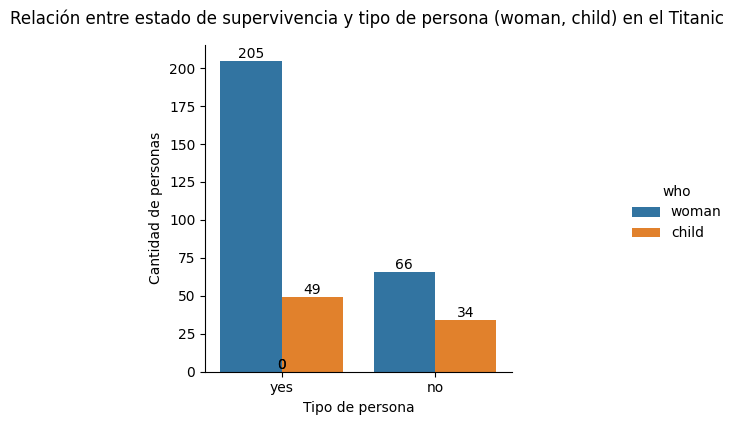

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar el DataFrame para incluir solo 'woman' y 'child' en la columna 'who'
filtered_df = df_titanic[df_titanic['who'].isin(['woman', 'child'])]

# Crear el gráfico de barras con los datos filtrados
g = sns.catplot(x='alive', hue='who', data=filtered_df, kind='count',
                height=4, aspect=1)

# Agregar etiquetas de valores a cada barra
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Etiquetas y título
plt.xlabel('Tipo de persona')
plt.ylabel('Cantidad de personas')
plt.suptitle('Relación entre estado de supervivencia y tipo de persona (woman, child) en el Titanic', y=1.05)
plt.show()


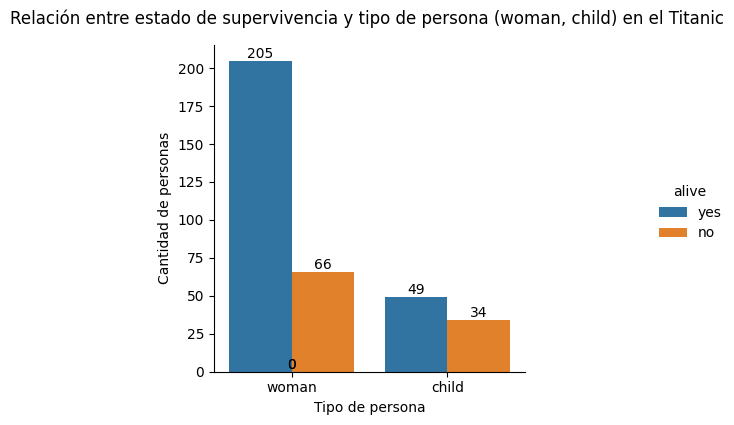

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar el DataFrame para incluir solo 'woman' y 'child' en la columna 'who'
filtered_df = df_titanic[df_titanic['who'].isin(['woman', 'child'])]

# Crear el gráfico de barras con los datos filtrados
g = sns.catplot(x='who', hue='alive', data=filtered_df, kind='count',
                height=4, aspect=1)

# Agregar etiquetas de valores a cada barra
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Etiquetas y título
plt.xlabel('Tipo de persona')
plt.ylabel('Cantidad de personas')
plt.suptitle('Relación entre estado de supervivencia y tipo de persona (woman, child) en el Titanic', y=1.05)
plt.show()

In [ ]:
### 5 . PUERTO DE EMBARQUE, INFLUYÓ?

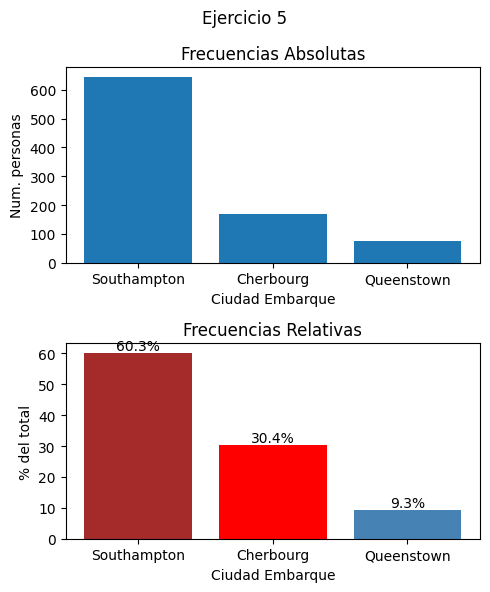

In [136]:
categorias = df.embark_town.value_counts().index.to_list()
frecuencias = df.embark_town.value_counts().to_list()
frec_relativas = (df_titanic.who.value_counts(normalize=True) * 100).to_list()

fig, ax = plt.subplots(2, 1, figsize=(5, 6))
fig.subplots_adjust(wspace=0.5)
plt.suptitle("Ejercicio 5")

# Gráfico de frecuencias absolutas
ax[0].bar(categorias, frecuencias)
ax[0].set_title("Frecuencias Absolutas")
ax[0].set_xlabel("Ciudad Embarque")
ax[0].set_ylabel("Num. personas")

# Gráfico de frecuencias relativas con porcentajes
bars = ax[1].bar(categorias, frec_relativas, color=["brown", "red", "steelblue"])
ax[1].set_title("Frecuencias Relativas")
ax[1].set_xlabel("Ciudad Embarque")
ax[1].set_ylabel("% del total")

# Agregar porcentajes en cada barra del gráfico de frecuencias relativas
for bar, percentage in zip(bars, frec_relativas):
    height = bar.get_height()
    ax[1].text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


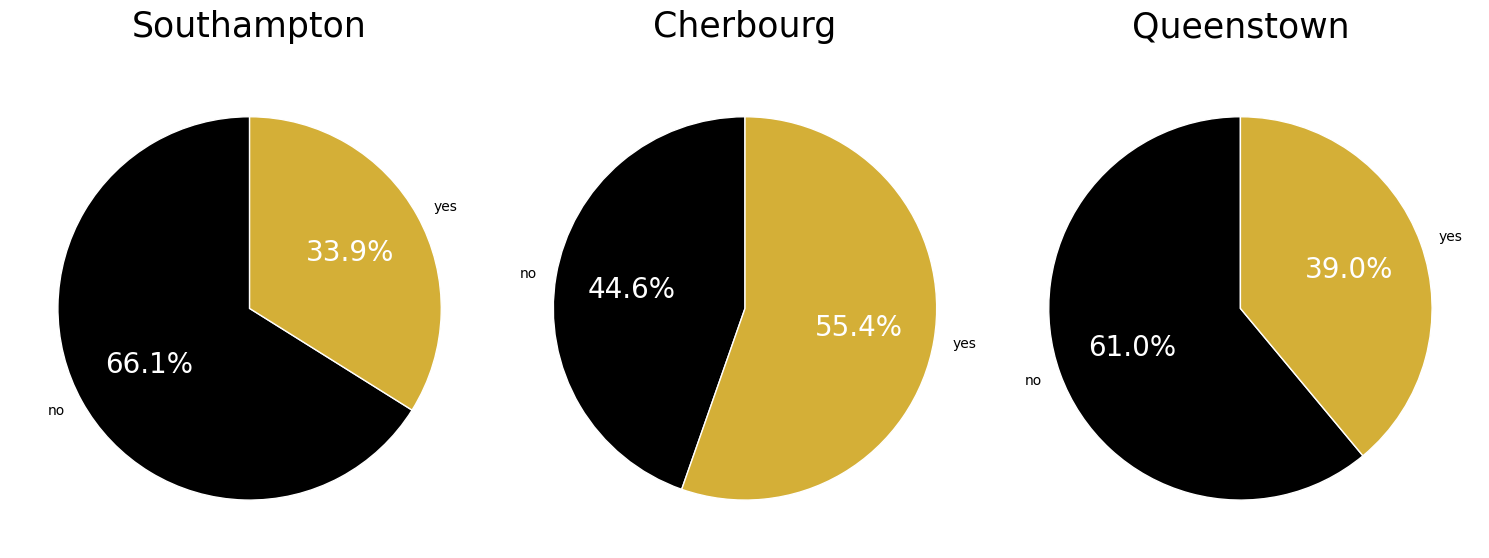

In [249]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular las frecuencias relativas para 'alive' y 'embark_town'
relative_counts_embark = df_titanic.groupby(['embark_town', 'alive']).size().unstack().apply(lambda x: x / x.sum(), axis=1)

# Ordenar los datos según las ubicaciones de embarque específicas
order = ['Southampton', 'Cherbourg', 'Queenstown']
relative_counts_embark = relative_counts_embark.loc[order]

# Configuración del gráfico circular para cada embark_town con colores personalizados
fig, axes = plt.subplots(1, 3, figsize=(15, 7), facecolor='none')

# Definir colores personalizados
colors = ['#000000', '#D4AF37', '#A93226']  # Negro, dorado, burdeos suave

# Gráficos circulares para cada embark_town
for i, town in enumerate(relative_counts_embark.index):
    pie_wedge_collection, _, autotexts = axes[i].pie(relative_counts_embark.loc[town], labels=relative_counts_embark.columns,
                                                     autopct='%1.1f%%', startangle=90, colors=colors)

    for autotext in autotexts:
        autotext.set_color('white')  # Texto de porcentaje en blanco
        autotext.set_fontsize(20)  # Tamaño del texto de porcentaje

    axes[i].set_title(f'{town}', fontsize=25, y=1.05)  # Ajuste de tamaño y posición del título

    # Ajuste del borde blanco a las porciones del pastel
    for pie_wedge in pie_wedge_collection:
        pie_wedge.set_edgecolor('white')

plt.tight_layout()

# Para guardar la imagen con fondo transparente
plt.savefig('pie_chart_embark_town_alive.png', transparent=True)
plt.show()


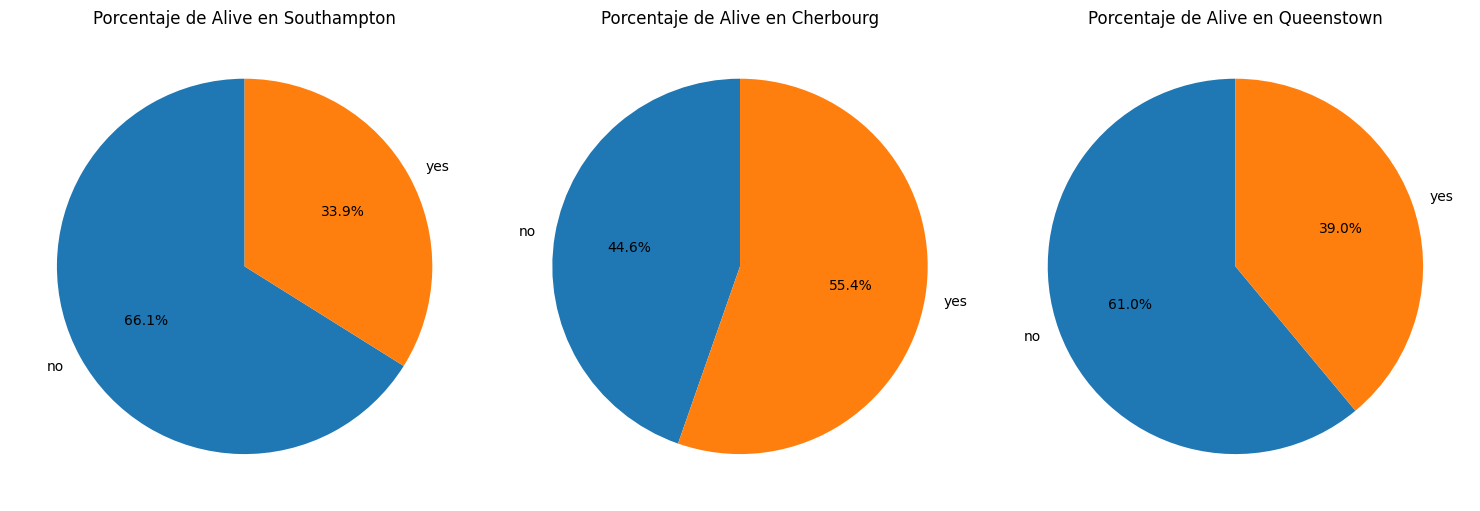

In [138]:
# Calcular las frecuencias relativas para 'alive' y 'embark_town'
relative_counts_embark = df_titanic.groupby(['embark_town', 'alive']).size().unstack().apply(lambda x: x / x.sum(), axis=1)

# Ordenar los datos según las ubicaciones de embarque específicas
order = ['Southampton', 'Cherbourg', 'Queenstown']
relative_counts_embark = relative_counts_embark.loc[order]

# Graficar tres gráficos circulares para cada embark_town
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Gráficos circulares para cada embark_town
for i, town in enumerate(relative_counts_embark.index):
    axes[i].pie(relative_counts_embark.loc[town], labels=relative_counts_embark.columns, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'Porcentaje de Alive en {town}')

plt.tight_layout()
plt.show()


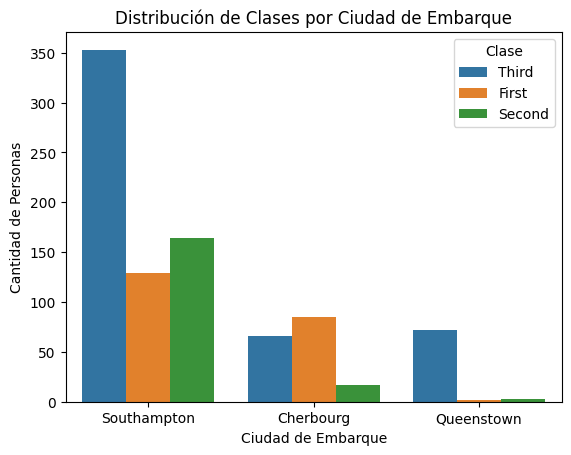

In [139]:
# Crear un gráfico de barras apiladas para mostrar la distribución de clases en cada embark_town
sns.countplot(x='embark_town', hue='class', data=df_titanic)
plt.xlabel('Ciudad de Embarque')
plt.ylabel('Cantidad de Personas')
plt.title('Distribución de Clases por Ciudad de Embarque')
plt.legend(title='Clase', loc='upper right')
plt.show()


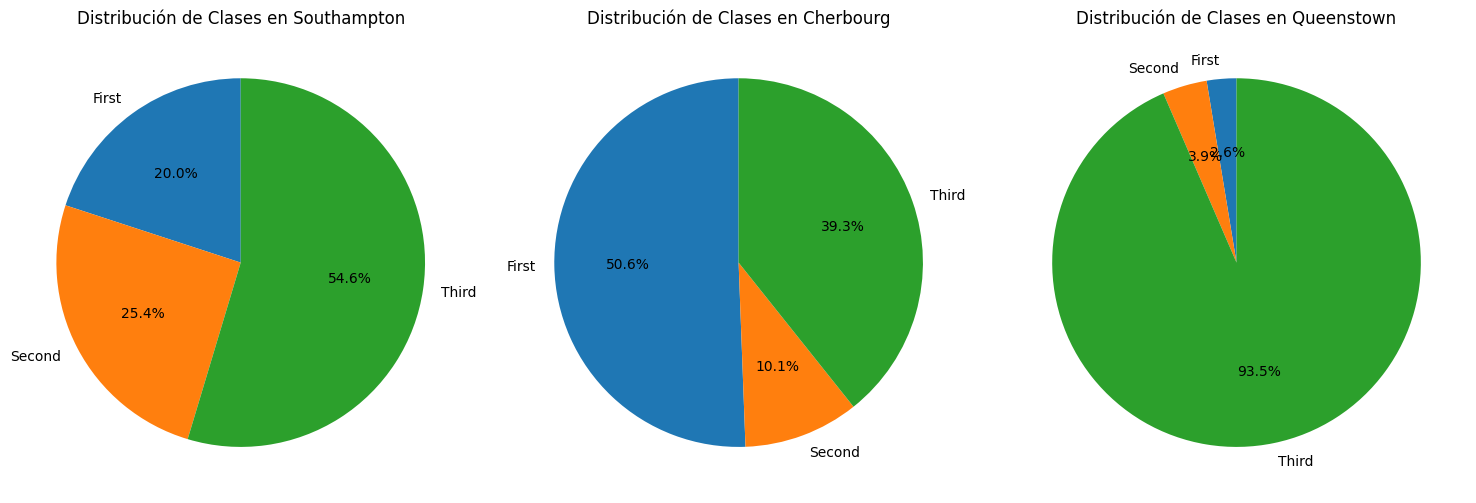

In [145]:
# Calcular la distribución de clases para cada ciudad de embarque
class_distribution = df_titanic.groupby('embark_town')['class'].value_counts(normalize=True).unstack()

# Ordenar los datos según las ciudades de embarque específicas
order = ['Southampton', 'Cherbourg', 'Queenstown']
class_distribution = class_distribution.loc[order]

# Configuración del gráfico circular para cada ciudad de embarque
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Gráficos circulares para cada ciudad de embarque
for i, town in enumerate(class_distribution.index):
    axes[i].pie(class_distribution.loc[town], labels=class_distribution.columns, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'Distribución de Clases en {town}')

plt.tight_layout()
plt.show()



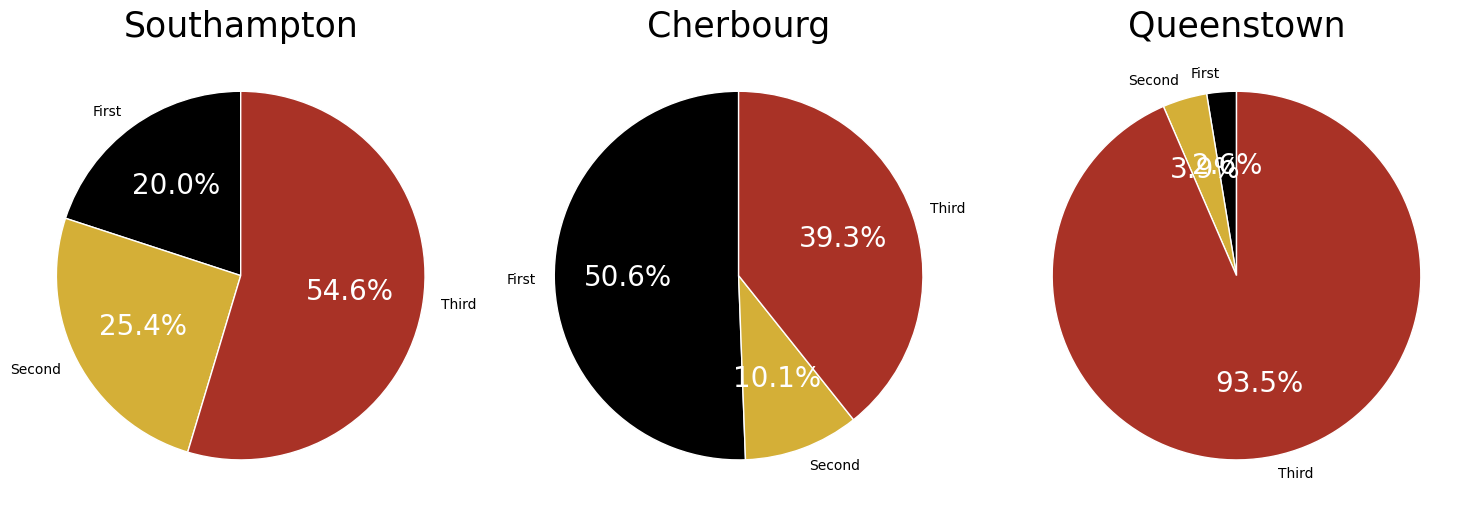

In [241]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la distribución de clases para cada ciudad de embarque
class_distribution = df_titanic.groupby('embark_town')['class'].value_counts(normalize=True).unstack()

# Ordenar los datos según las ciudades de embarque específicas
order = ['Southampton', 'Cherbourg', 'Queenstown']
class_distribution = class_distribution.loc[order]

# Configuración del gráfico circular para cada ciudad de embarque con colores personalizados
fig, axes = plt.subplots(1, 3, figsize=(15, 7), facecolor='none')

# Definir colores personalizados
colors = ['#000000', '#D4AF37', '#A93226']  # Negro, dorado, burdeos suave

# Gráficos circulares para cada ciudad de embarque
for i, town in enumerate(class_distribution.index):
    pie_wedge_collection, _, autotexts = axes[i].pie(class_distribution.loc[town], labels=class_distribution.columns,
                                                     autopct='%1.1f%%', startangle=90, colors=colors)

    for autotext in autotexts:
        autotext.set_color('white')  # Texto de porcentaje en blanco
        autotext.set_fontsize(20)  # Tamaño del texto de porcentaje

    axes[i].set_title(f'{town}', fontsize=25, y=1)  # Ajuste de tamaño y posición del título

    # Ajuste del borde blanco a las porciones del pastel
    for pie_wedge in pie_wedge_collection:
        pie_wedge.set_edgecolor('white')

plt.tight_layout()

# Para guardar la imagen con fondo transparente
plt.savefig('pie_chart_embark_town.png', transparent=True)
plt.show()



In [72]:
def compara_categoricas(df, col1, col2):
    fig, axs = plt.subplots(1, 2, figsize=(12, 5)) # Creamos la fila inicial
    sns.countplot(x=col1, data=df, ax=axs[0], hue = col1)
    axs[0].set_title(f'Frecuencias Absolutas de {col1}')
    sns.countplot(x=col2, data=df, ax=axs[1], hue = col2)
    axs[1].set_title(f'Frecuencias Absolutas de {col2}')

    # Añadimos la comparativa como una figura adicional (catplot no se puede generar a nivel de AXES, es una Figure ya de por sí.)
    catplot = sns.catplot(x=col1, col=col2, kind="count", data=df, hue = col1)
    catplot.fig.suptitle(f'Catplot de {col1} por {col2}', y = 1.1) # Aumentamos ligeramente la coordenada y (ver docstring de suptitle) para que no se superpongan los letreros       
   
    contingency_table = pd.crosstab(df[col1], df[col2])
    return contingency_table

who,child,man,woman
alive,,,
no,34,449,66
yes,49,88,205


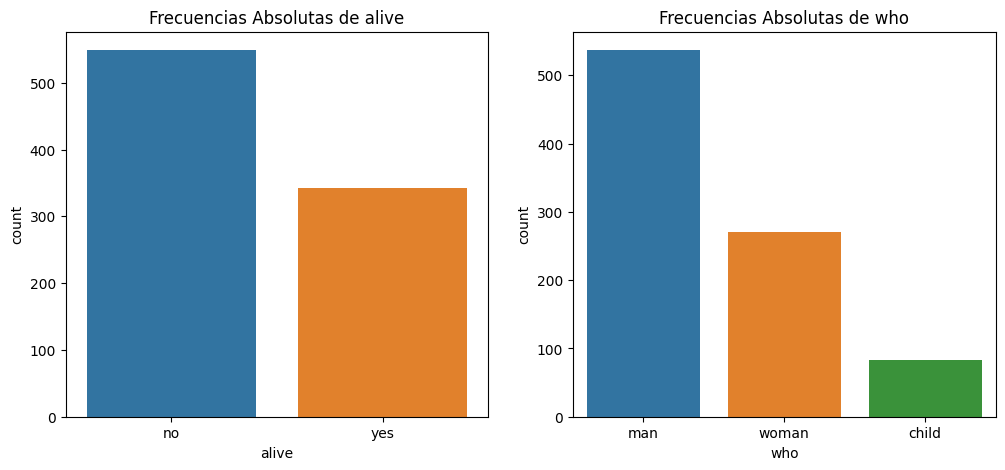

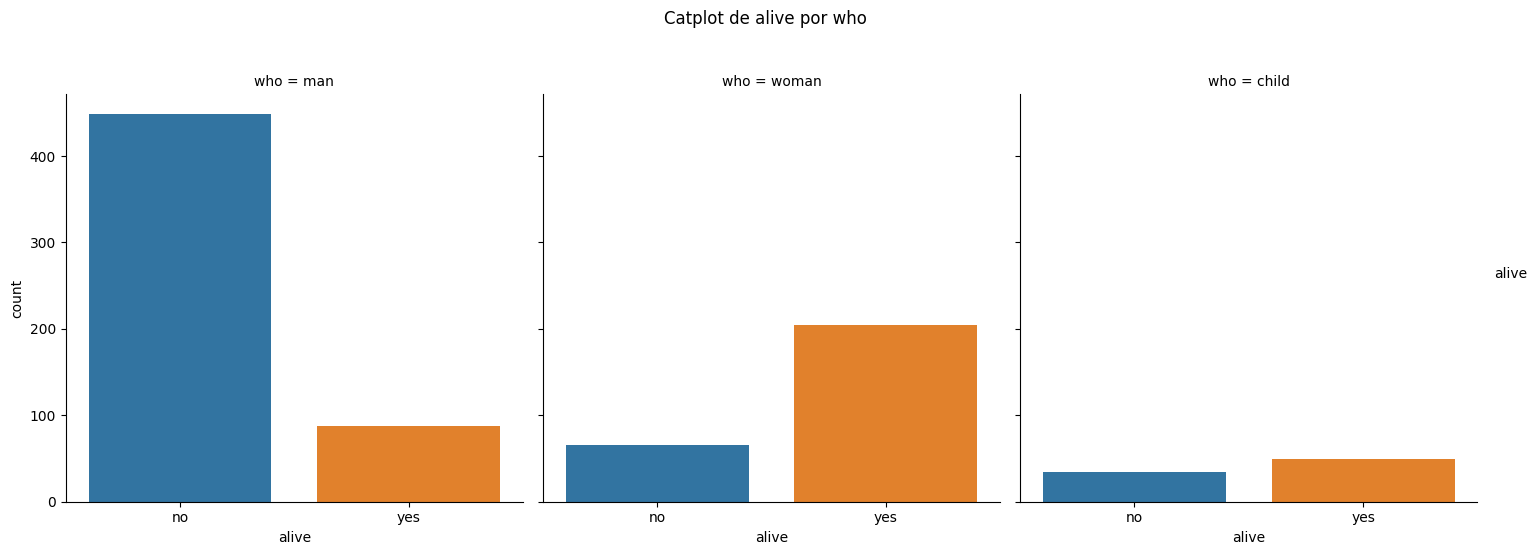

In [73]:
compara_categoricas(df_titanic,"alive","who")

alive,no,yes
who,,
child,34,49
man,449,88
woman,66,205


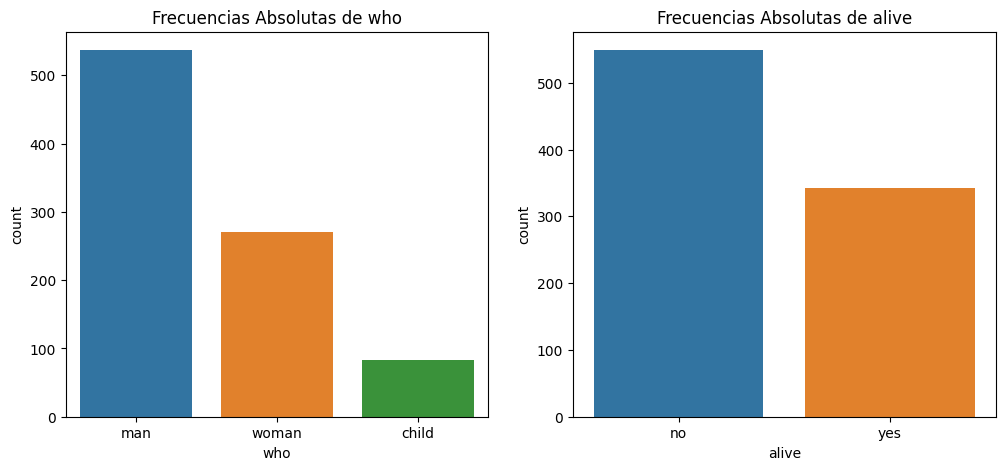

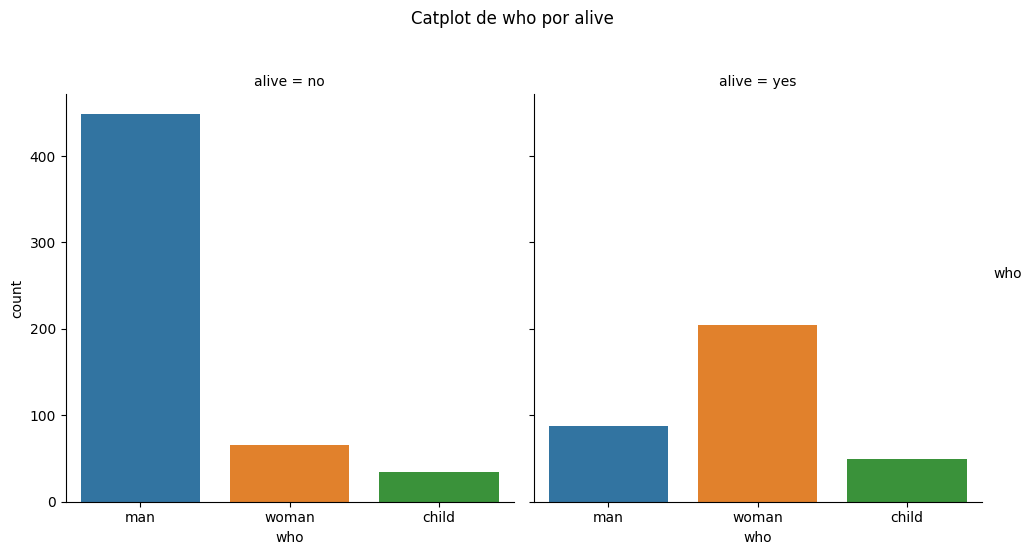

In [96]:
compara_categoricas(df_titanic,"who","alive")